### Project and data are based on a free, online course of machine learning https://www.coursera.org/learn/machine-learning. I wholeheartedly recommend this! 

## I will show how do it in Python:
    + logistic regression multi-class classication,
    + neutral networks only forward propagation now,
    + plotting images from numpy arrays.

In [1]:
%matplotlib inline
import numpy as np
import pandas
import scipy.io
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
import warnings
import sys

# ignore warnings
warnings.filterwarnings('ignore')

# write packages and python version to file
'''
! python -m pip list > packages_versions.txt
# a append to file
with open('packages_versions.txt', 'a') as f:
    f.write('Python version ' + str(sys.version))
'''

In [2]:
def manage_array(X, size):
    '''
    Returns array with values between 0 and 1.
    0 gives black, 1 white color when using cmap = 'gray'
    Images are seperated by white lines
    '''    
    z = np.ones((20*size + size - 1, 20*size + size - 1))
    # choose randomly size ** 2 pics from all possible
    choosed = random.sample(range(X.shape[0]), size ** 2)
    for no_pic in range(size ** 2):
        pic = X[choosed[no_pic]]
        x, y = divmod(no_pic, size)
        for i in range(400):
            d, r = divmod(i,20)
            z[r + 20*x + x][d + 20*y + y] = pic[i]
    if size == 1:
        return z, choosed[0]
    else:
        return z

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def cost_function_reg(theta, X, Y, lambda_ = 0):
    # cost function with regulazation
    n = len(theta)
    m = len(X)
    theta = np.array(theta).reshape(n,1)
    temp = sigmoid(X @ theta)
    J =  np.sum(-Y*np.log(temp) - (1 - Y)*np.log(1 - temp))/m + np.sum(lambda_/(2*m) * theta[1:]**2)
    return J

def jac_reg(theta, X, Y, lambda_ = 0):
    # gradient of cost function with regulazation
    m = len(X)
    n = len(theta)
    theta = np.array(theta).reshape(n,1)
    temp = sigmoid(X @ theta)
    grad = (X.T @ (temp - Y)/m).reshape(n)    
    reg = (lambda_ * theta / m).reshape(n)
    reg[0] = 0
    return grad + reg
            
def cat_ones(X):
    m = len(X)
    ones = np.ones((m,1))
    return np.concatenate((ones, X),axis = 1)

def predict_nn(X, *thetas):
    '''
    Predicts output value for neural network.
    '''
    temp = forward_propagation(X, *thetas)
    pred = np.argmax(temp, axis = 1)
    pred = (pred + 1) % 10
    pred = np.reshape(pred, (len(X), 1))
    return pred

def forward_propagation(X, *thetas):
    '''
    Calculates hypothesis function for neural network.
    '''
    i = 0
    for theta in thetas:
        if i != 0:
            X = sigmoid(X)
        X = cat_ones(X)
        X = X @ theta.T
        i += 1
    hx = sigmoid(X)
    return  hx

def predict_multi_class(X, all_theta):
    '''
    returns predictions for all examples
    '''
    return np.reshape(np.argmax(sigmoid(X @ all_theta.T), axis = 1), (len(X), 1))

def accuracy(predictions, Y):
    '''
    returns accuracy
    '''
    return np.mean(predictions == Y) * 100

## Part 1 multi-class classification using logistic regression.

In [3]:
# load .mat file
mat = scipy.io.loadmat('ex3data1.mat')

In [4]:
X = mat['X']
Y = mat['y']
Y[np.where(Y == 10)] = 0 #originally 10 coded 0, now 0 -> 0, 1->1 etc.

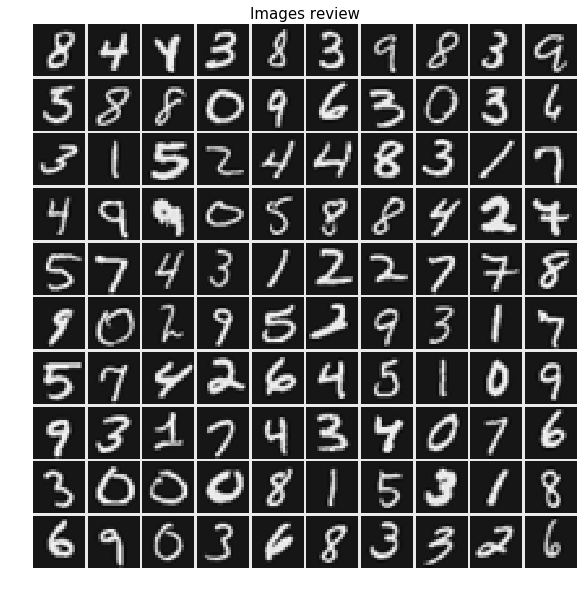

In [5]:
# Lets plot some data
z = manage_array(X, 10)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(z, cmap="gray")
plt.title('Images review', size = 15);

In [6]:
x = np.reshape(np.linspace(0.1, 1.5 , 15), (5,3), 'F')
theta = np.array([[-2], [-1], [1], [2]])
y = np.array([[1], [0], [1], [0], [1]])
x = cat_ones(x)

assert np.allclose(cost_function_reg(theta, x, y, lambda_ = 3), 2.534819)

assert np.allclose(jac_reg(theta, x, y, lambda_ = 3), 
              np.array([0.146561, -0.548558,  0.724722, 1.398003]))

In [7]:
# set parameters
X_ones = cat_ones(X)
n = np.size(X_ones, axis = 1)
theta = np.zeros((n))
lambda_ = 0.1
all_theta = np.zeros((10, n))
# compute costs i vs all
# res.fun gives access to cost value
# minimilize method - BFGS
for i in range(10):
    Y_temp = (Y == i).astype(int) # with boolean doesn't work, so convert True -> 1
    res = minimize(cost_function_reg, theta, args = (X_ones, Y_temp, lambda_), jac = jac_reg, method = 'BFGS')
    all_theta[i][:] = res.x
    print(i ,'vs all,', "cost = ", res.fun)

0 vs all, cost =  0.00858333644575774
1 vs all, cost =  0.013128373669473087
2 vs all, cost =  0.05081011390485514
3 vs all, cost =  0.057611641193561915
4 vs all, cost =  0.033074850125165235
5 vs all, cost =  0.054465643580803094
6 vs all, cost =  0.018264576972100398
7 vs all, cost =  0.030653180391400883
8 vs all, cost =  0.07845733652701932
9 vs all, cost =  0.07119337754641622


In [8]:
prediction = predict_multi_class(X_ones, all_theta)
acc = accuracy(prediction, Y)
print('Accuracy at training set = {}'.format(acc))

Accuracy at training set = 96.48


## Part 2 multi-class classification using neutral networks.

In [9]:
X = mat['X']
Y = mat['y']
weights = scipy.io.loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']

In [10]:
pred = predict_nn(X, theta1, theta2)
acc = accuracy(pred, Y)
print('Accuracy of neutral network at training = ', acc, 'proc')

Accuracy of neutral network at training =  97.52 proc


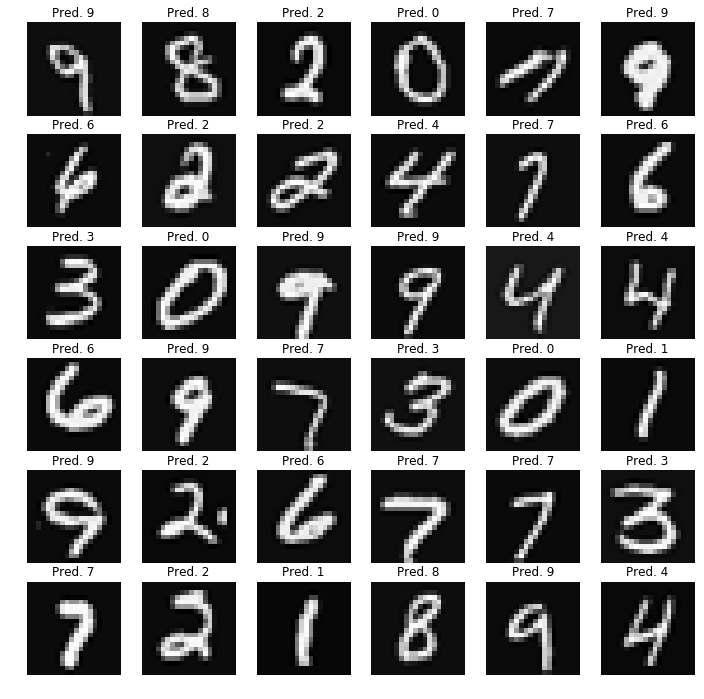

In [11]:
# let visualize our prediction with subplots
fig, t = plt.subplots(6,6)
fig.set_size_inches((12,12))
for i in range(6):
    for j in range(6):
        z, ind = manage_array(X, 1)
        t[i][j].axis('off')
        t[i][j].set_title('Pred. {}'.format(pred[ind][0]))
        t[i][j].imshow(z, cmap = 'gray')
    
    